### Importing libraries

In [1]:
import os
import warnings 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px #for plotting unique charts
import plotly.io as pio

import colorama # built in python module to express texts in different colors
from colorama import Fore, Style
warnings.simplefilter(action='ignore', category=FutureWarning)
print(Fore.BLUE + "All Libraries Imported Successfully!")

All Libraries Imported Successfully!


In [2]:
mydata=pd.read_csv("file:///C:/Users/hp/Downloads/coviddeathbycountry.csv")

### Loading dataset

In [3]:
mydata.head()

,Country,Deaths,Cases
0,Peru,213769,3729879
1,Bulgaria,37289,1183877
2,Bosnia and Herzegovina,15817,380749
3,Hungary,46696,1940824
4,Georgia,16847,1667453


In [4]:
mydata.shape

(217, 3)

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  217 non-null    object
 1   Deaths   217 non-null    object
 2   Cases    217 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.2+ KB


In [6]:
mydata.isnull().sum()

Country    0
Deaths     0
Cases      0
dtype: int64

In [11]:
mydata.dtypes

Country    object
Deaths     object
Cases       int64
dtype: object

In [7]:
mydata.describe()

,Cases
count,2.170000e+02
mean,3.300453e+06
std,1.320264e+07
min,1.000000e+00
25%,2.838900e+04
50%,2.348800e+05
75%,1.287088e+06
max,1.547888e+08


In [8]:
int = mydata["Country"].nunique()
print(Fore.BLUE + "There are" + " " + str(int) + " " + "unique Countries in our Dataset")

There are 217 unique Countries in our Dataset


In [12]:
mydata['Deaths'] = mydata['Deaths'].str.replace('—','0')

In [13]:
mydata["Deaths"] = pd.to_numeric(mydata["Deaths"])

In [14]:
mydata.dtypes

Country    object
Deaths      int64
Cases       int64
dtype: object

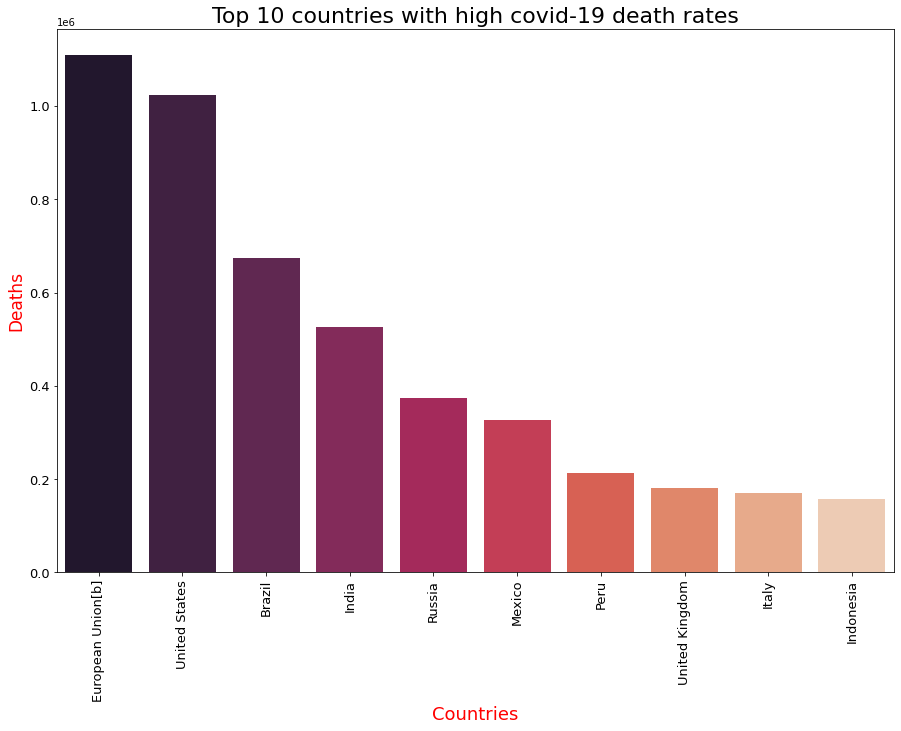

In [31]:
dfa = mydata.sort_values('Deaths', ascending = False)
plt.figure(figsize=(15,10))
ax_1 = sns.barplot(x='Country', y='Deaths', data=dfa.head(10), palette='rocket')

plt.xticks(fontsize=13, color='black', rotation=90)
plt.yticks(fontsize=13, color='black')
plt.xlabel('Countries', size = 18, color='red')
plt.ylabel('Deaths', size = 17 , color='red')
plt.title('Top 10 countries with high covid-19 death rates', size = 22 , color='black')
plt.show()

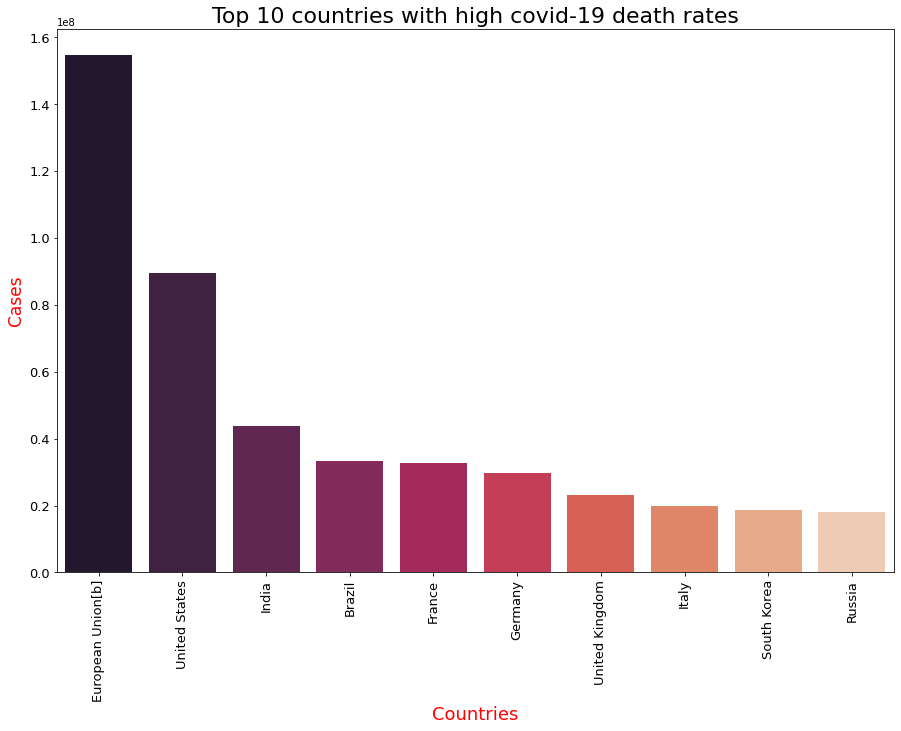

In [33]:
dfa_case = mydata.sort_values('Cases', ascending = False)

plt.figure(figsize=(15,10))
ax_1 = sns.barplot(x='Country', y='Cases', data=dfa_case.head(10), palette='rocket')

plt.xticks(fontsize=13, color='black', rotation=90)
plt.yticks(fontsize=13, color='black')
plt.xlabel('Countries', size = 18, color='red')
plt.ylabel('Cases', size = 17 , color='red')
plt.title('Top 10 countries with high covid-19 death rates', size = 22 , color='black')
plt.show()

### Scatter plot of cross cases & deaths

In [35]:
fig = px.scatter(mydata, x="Cases", y="Deaths", color="Deaths",
                 size='Deaths', hover_data=['Country', 'Cases', 'Deaths'], template = 'plotly_white', 
                 title='Scatter Plot of cross cases and deaths')
fig.show()

### Global map(Cases)

In [36]:
fig = px.scatter_geo(mydata, locationmode = "country names", locations="Country", color="Deaths",
                     hover_data=['Country', 'Cases', 'Deaths'], size="Deaths",
                     projection="natural earth", size_max = 35, template = 'plotly_dark')
fig.show()

### Global map(Death cases)

In [37]:
fig = px.scatter_geo(mydata, locationmode = "country names", locations="Country", color="Cases",
                     hover_data=['Country', 'Cases', 'Deaths'], size="Cases",
                     projection="natural earth", size_max = 40, template = 'plotly_dark')
fig.show()